In [26]:
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

dataset = pd.read_csv('income.csv')
print(dataset)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [27]:
properties_is_null = dataset.isnull().sum()
print(properties_is_null)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


<Axes: title={'center': 'Objects in workclass'}, xlabel='objects', ylabel='count'>

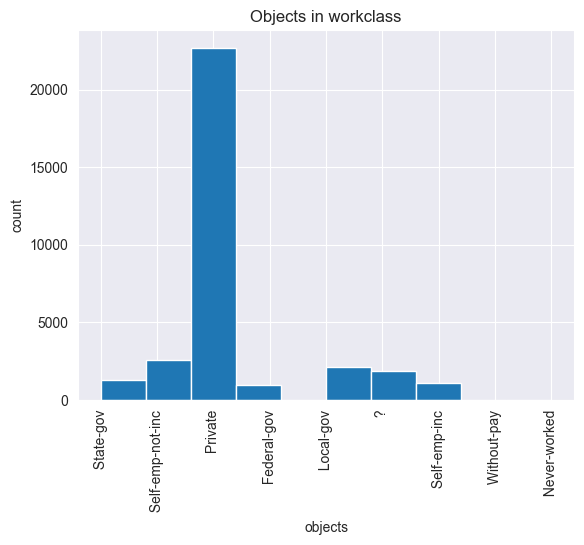

In [28]:
plt.xticks(rotation=90)
plt.title('Objects in workclass')
plt.ylabel('count')
plt.xlabel('objects')
dataset['workclass'].hist()

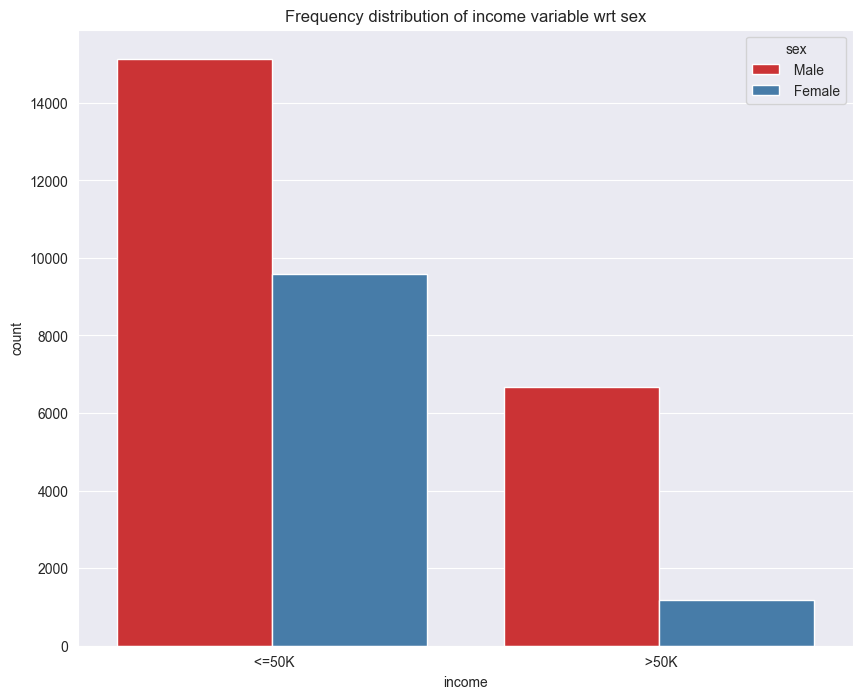

In [29]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='income', hue='sex', data=dataset, palette='Set1')
ax.set_title('Frequency distribution of income variable wrt sex')
plt.show()

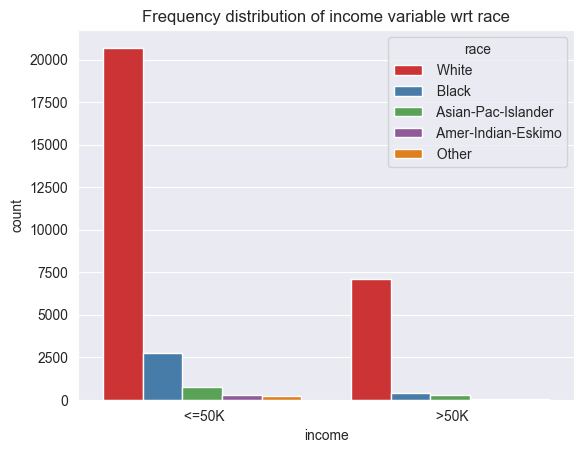

In [30]:
ax = sns.countplot(x='income', hue='race', data=dataset, palette='Set1')
ax.set_title('Frequency distribution of income variable wrt race')
plt.show()

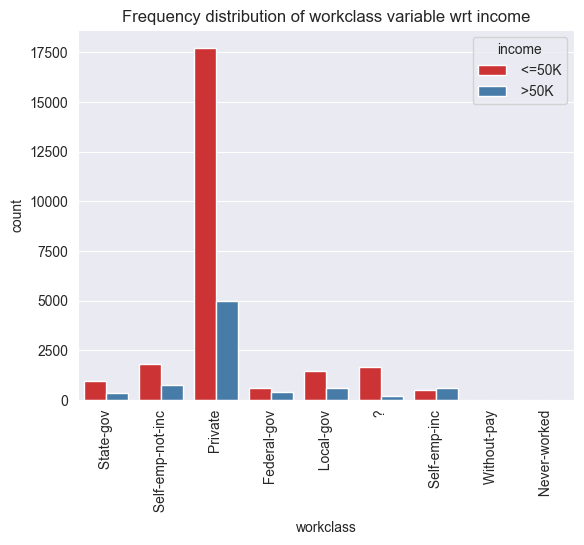

In [31]:
plt.xticks(rotation=90)
ax = sns.countplot(x='workclass', hue='income', data=dataset, palette='Set1')
ax.set_title('Frequency distribution of workclass variable wrt income')
plt.show()

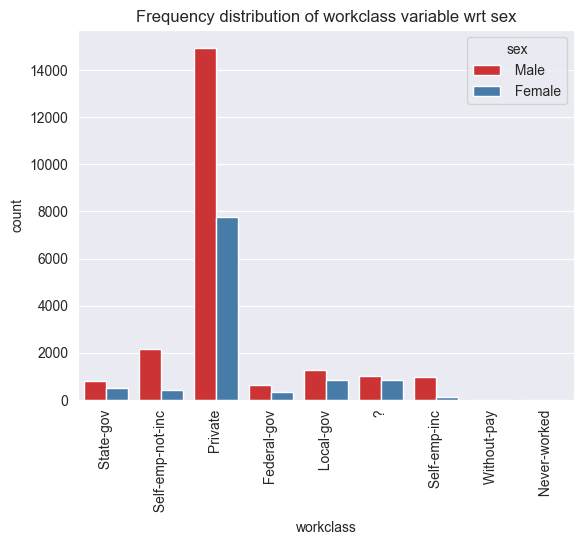

In [32]:
plt.xticks(rotation=90)
ax = sns.countplot(x='workclass', hue='sex', data=dataset, palette='Set1')
ax.set_title('Frequency distribution of workclass variable wrt sex')
plt.show()

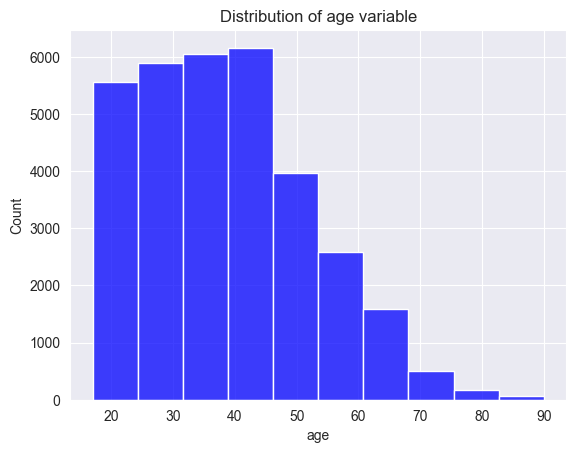

In [33]:
x = dataset['age']
ax = sns.histplot(x, bins=10, color='blue')
ax.set_title('Distribution of age variable')
plt.show()

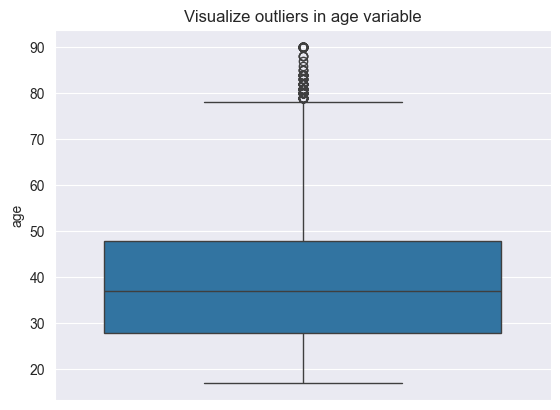

In [34]:
x = dataset['age']
ax = sns.boxplot(x)
ax.set_title('Visualize outliers in age variable')
plt.show()

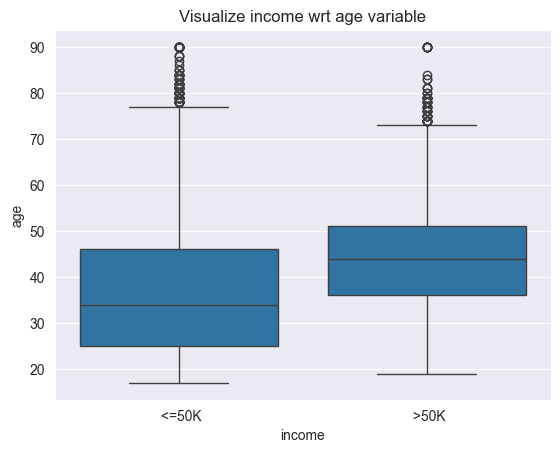

In [35]:
ax = sns.boxplot(x='income', y='age', data=dataset)
ax.set_title('Visualize income wrt age variable')
plt.show()

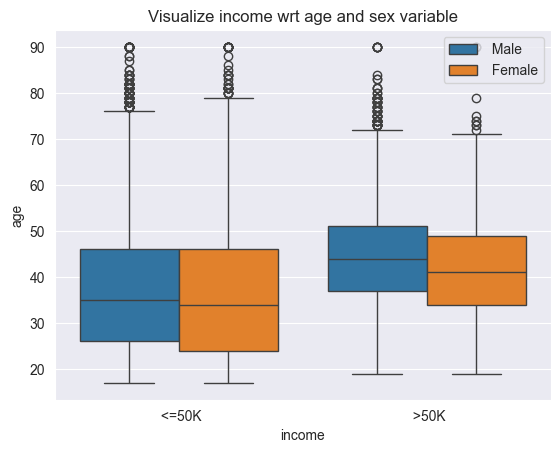

In [36]:
ax = sns.boxplot(x='income', y='age', hue='sex', data=dataset)
ax.set_title('Visualize income wrt age and sex variable')
ax.legend(loc='upper right')
plt.show()

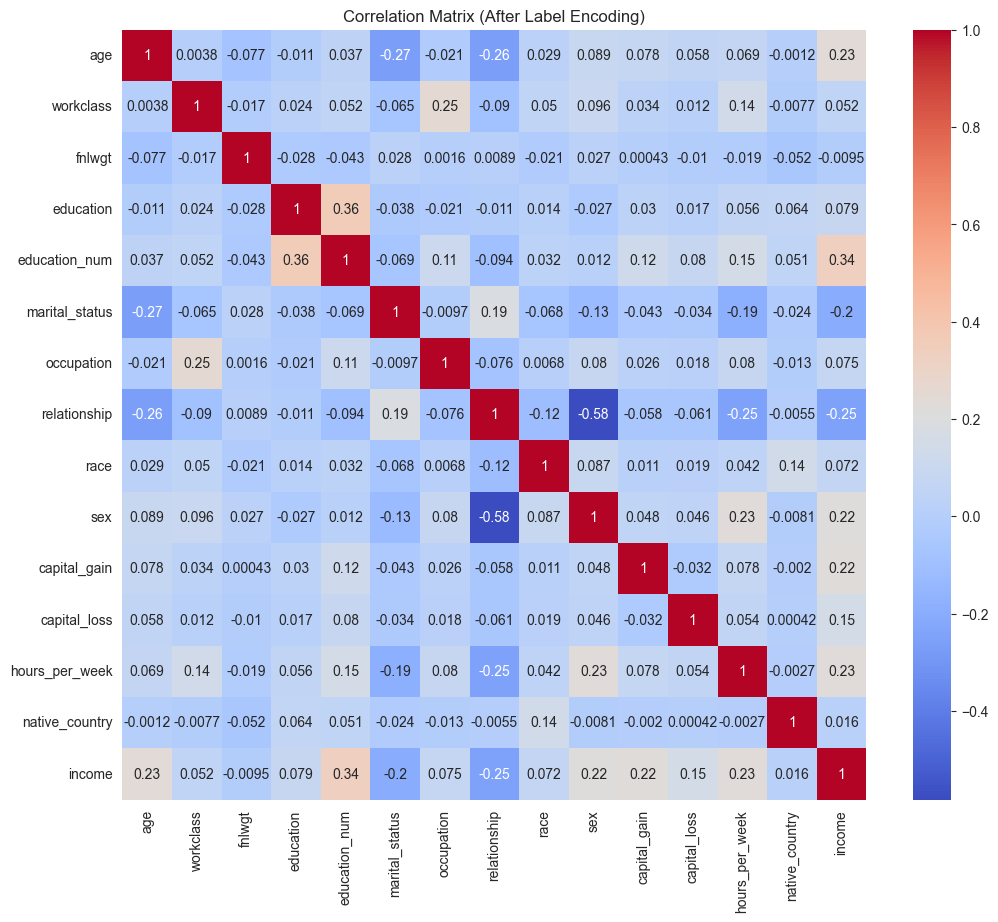

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dataset_corr = pd.read_csv('income.csv')

for col in dataset_corr.select_dtypes(include=['object']).columns:
    dataset_corr[col] = label_encoder.fit_transform(dataset_corr[col])
    
correlation_matrix = dataset_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (After Label Encoding)')
plt.show()

<Axes: title={'center': 'Objects in workclass'}, xlabel='objects', ylabel='count'>

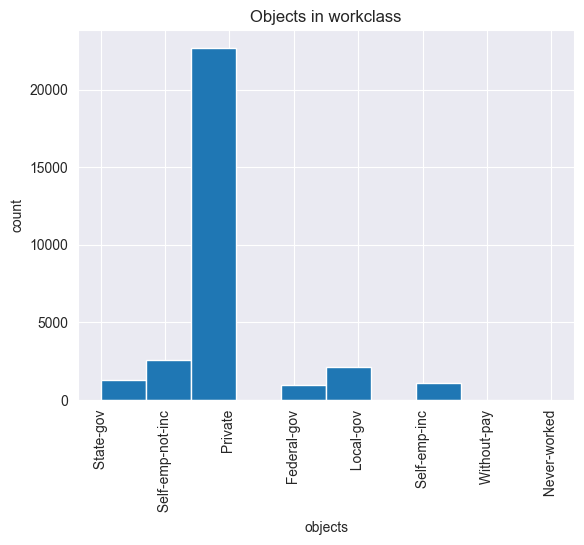

In [38]:
dataset.replace(' ?', np.NaN, inplace=True)
plt.xticks(rotation=90)
plt.title('Objects in workclass')
plt.ylabel('count')
plt.xlabel('objects')
dataset['workclass'].hist()

In [39]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
dataset[categorical].head()


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [40]:
numerable = [var for var in dataset.columns if dataset[var].dtype!='O']
dataset[numerable].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [41]:
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

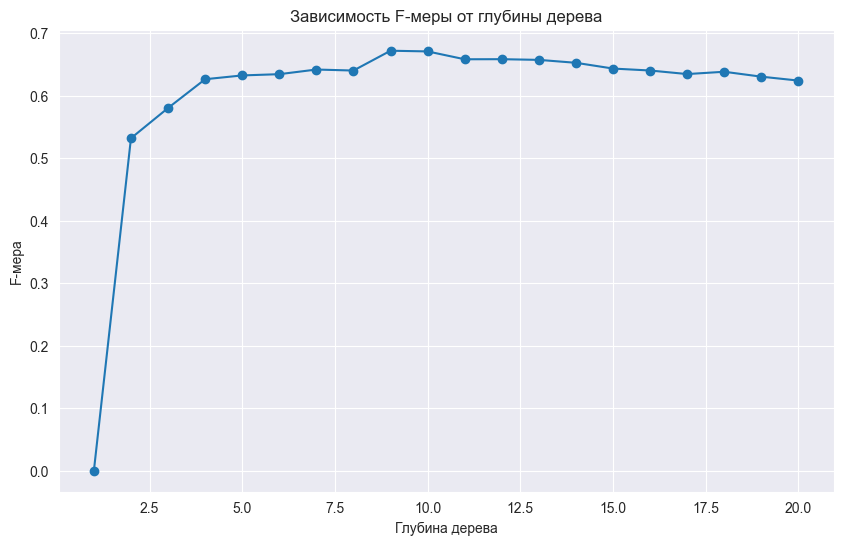

In [42]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('income', axis=1), dataset['income'], test_size=0.3, random_state=10)

depths = range(1, 21)
f1_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(depths, f1_scores, marker='o')
plt.xlabel('Глубина дерева')
plt.ylabel('F-мера')
plt.title('Зависимость F-меры от глубины дерева')
plt.grid(True)
plt.show()


In [43]:
model = DecisionTreeClassifier(max_depth=8, random_state=10)
    
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)

confusion_matrix_result = confusion_matrix(y_test, y_pred)

pd.DataFrame(data=confusion_matrix_result, columns=['predicate <=50', 'predicate >50'], index=['actual <=50', 'actual >50']).head()

,predicate <=50,predicate >50
actual <=50,7025,398
actual >50,1054,1292


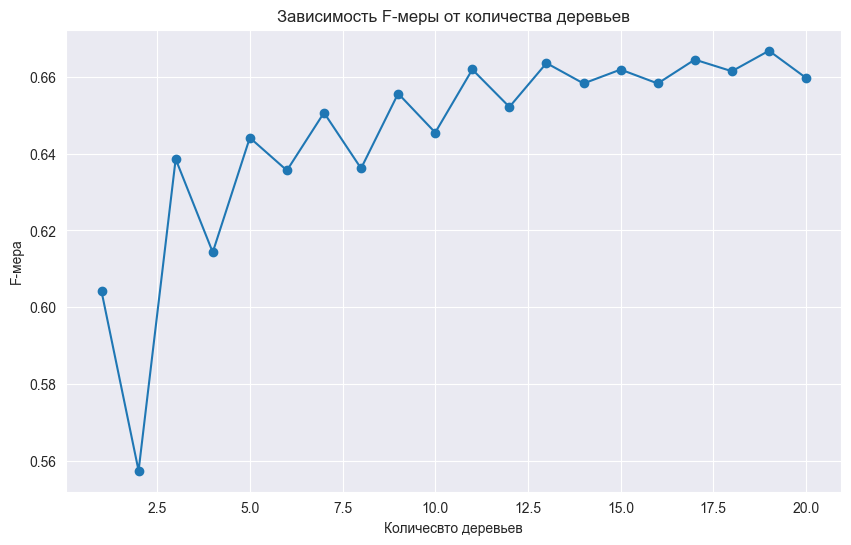

In [44]:
trees = range(1, 21)
f1_scores = []

for tree in trees:
    model = RandomForestClassifier(n_estimators=tree, random_state=10)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(depths, f1_scores, marker='o')
plt.xlabel('Количесвто деревьев')
plt.ylabel('F-мера')
plt.title('Зависимость F-меры от количества деревьев')
plt.grid(True)
plt.show()

In [45]:
model = RandomForestClassifier(n_estimators=18, random_state=10)
    
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)

confusion_matrix_result = confusion_matrix(y_test, y_pred)

pd.DataFrame(data=confusion_matrix_result, columns=['predicate <=50', 'predicate >50'], index=['actual <=50', 'actual >50']).head()

,predicate <=50,predicate >50
actual <=50,6932,491
actual >50,944,1402
